## Beginner

Write your own iterative sequence to evaluate the following:
- The first three numbers in a sequence are 1, 3, 7. 
- The following number is equal to the ratio of the differences of the previous three, with the most recent numbers on the numerator  (eg the 4th number is (7-3) /(3-1) = 2)
- What is the 107th number in the sequence?
- What is the largest number that occurs after 1000 iterations?
(Note that they will not be integers for very long!)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
seq = list([1,3,7])

for i in range(2,1000-1):
    new = (seq[i] - seq[i-1])/(seq[i-1] - seq[i-2]) 
    seq.append(new)
    
len(seq)

1000

In [3]:
seq[107]

-1.7264741095257057

In [4]:
np.max(seq)

32565.70342281041

## Advanced
Implement the two boundry conditions: Fixed voltage, constant gradient

Text(0, 0.5, 'Voltage, V')

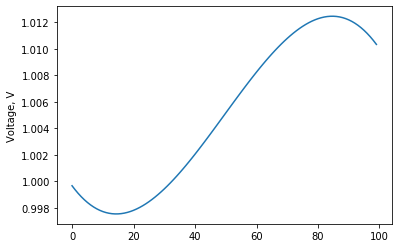

In [5]:
# Constant Voltage (Dirichlet Boundary condition)

nodes = 100 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 

# Have a look at the diag documentation linked above 
Poisson_Matrix = np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)


centre = length/2
rho = np.zeros(nodes)
for i in range(nodes):
    x = i*a - centre # Find our position relative to centre
    rho[i] = 0.5*x

eps = 1
rho_mod = rho*-1*a**2*eps

# MODIFICATION STARTS HERE
edge = np.zeros(np.shape(rho)) 
edge[0] = 1
edge[-1] = 1.01

rho_mod = rho_mod - edge

# Finally, let's generate a solution via matrix inversion. As always, this is quite a slow method (but we're lazy :) )
V = np.linalg.solve(Poisson_Matrix, rho_mod)
plt.figure()
plt.plot(V)
plt.ylabel('Voltage, V')

[[-1  1  0  0  0  0  0  0  0  0]
 [ 1 -2  1  0  0  0  0  0  0  0]
 [ 0  1 -2  1  0  0  0  0  0  0]
 [ 0  0  1 -2  1  0  0  0  0  0]
 [ 0  0  0  1 -2  1  0  0  0  0]
 [ 0  0  0  0  1 -2  1  0  0  0]
 [ 0  0  0  0  0  1 -2  1  0  0]
 [ 0  0  0  0  0  0  1 -2  1  0]
 [ 0  0  0  0  0  0  0  1 -2  1]
 [ 0  0  0  0  0  0  0  0  1 -1]]


<Figure size 432x288 with 0 Axes>

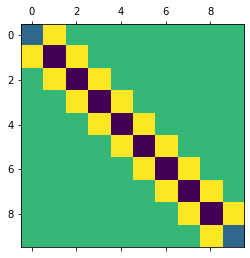

In [6]:
# Constant Gradient (Neumann Boundary condition)

nodes = 10 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 

# Have a look at the diag documentation linked above 
Poisson_Matrix = np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

Poisson_Matrix[0][0] = -1
Poisson_Matrix[-1][-1] = -1

# Print the matrix to examine it ourselves
print(Poisson_Matrix)
plt.figure()
plt.matshow(Poisson_Matrix)

#The rest of the solution is as normal